(c_rasters)=
 
----------------

```{admonition} Learning Objectives
An example of an admonition with a title.
* Create new raster objects 
* Assign the correct projection or CRS
```
```{admonition} Review
* [IMPORTANT: Affine transformation](d_affine)
```
----------------

# Raster Data 
In order to work with raster data we will be using `rasterio`. Behind the scenes a `numpy.ndarray` does all the heavy lifting. To understand how raster works it helps to construct one from scratch. 

Here we create two `ndarray` objects one `X` spans [-90&deg;,90&deg;] longitude, and `Y` covers [-90&deg;,90&deg;] latitude.

In [1]:
import numpy as np
x = np.linspace(-90, 90, 7)
y = np.linspace(90, -90, 7)
X, Y = np.meshgrid(x, y)
X

array([[-90., -60., -30.,   0.,  30.,  60.,  90.],
       [-90., -60., -30.,   0.,  30.,  60.,  90.],
       [-90., -60., -30.,   0.,  30.,  60.,  90.],
       [-90., -60., -30.,   0.,  30.,  60.,  90.],
       [-90., -60., -30.,   0.,  30.,  60.,  90.],
       [-90., -60., -30.,   0.,  30.,  60.,  90.],
       [-90., -60., -30.,   0.,  30.,  60.,  90.]])

In [2]:
Y

array([[ 90.,  90.,  90.,  90.,  90.,  90.,  90.],
       [ 60.,  60.,  60.,  60.,  60.,  60.,  60.],
       [ 30.,  30.,  30.,  30.,  30.,  30.,  30.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [-30., -30., -30., -30., -30., -30., -30.],
       [-60., -60., -60., -60., -60., -60., -60.],
       [-90., -90., -90., -90., -90., -90., -90.]])

Both arrays have the same spatial resolution

In [3]:
res = (x[-1] - x[0]) / len(x)
res

25.714285714285715

Let's generate some data representing temperature and store it an array `Z`

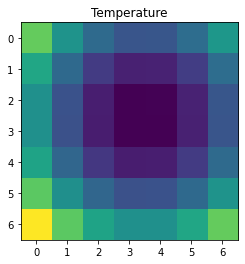

In [4]:
import matplotlib.pyplot as plt

Z1 =  np.abs(((X - 10) ** 2 + (Y - 10) ** 2) / 1 ** 2)
Z2 =  np.abs(((X + 10) ** 2 + (Y + 10) ** 2) / 2.5 ** 2)
Z =  (Z1 - Z2)

plt.imshow(Z)
plt.title("Temperature")
plt.show()

In this example the coordinate reference system will be '+proj=latlong', which describes an equirectangular coordinate reference system with units of decimal degrees. Although `X` and `Y` seems relevant to understanding the location of cell values, `rasterio` instead uses affine transformations instead. Affine transforms uses matrix algebra to describe where a cell is located (translation) and what its resolution is (scale). [Review affine transformations](d_affine_trans_scale) and [see an example here](d_affine_trans).

The affine transformation matrix can be computed from the matrix product of a translation (moving N,S,E,W) and a scaling (resolution). First, we start with translation where $\Delta x$ and $\Delta y$ define the location of the upper left hand corner of our new `Z` ndarray. As a reminder the translation matrix takes the form:

$$
   \begin{eqnarray}
     \mbox{Translate: }  \begin{bmatrix} 1 & 0 & \Delta x \\  0 & 1 & \Delta y \\ 0 & 0 & 1 \end{bmatrix}  
   \end{eqnarray}
$$

Now we can define our translation matrix using the point coordinates (`x[0]`,`y[0]`), but these need to be offset by 1/2 the resolution so that the cell is centered over the coodinate (-90,90):

In [5]:
from rasterio.transform import Affine
print(Affine.translation(x[0] - res / 2, y[0] - res / 2))

| 1.00, 0.00,-102.86|
| 0.00, 1.00, 77.14|
| 0.00, 0.00, 1.00|


We also need to scale our data based on the resolution of each cell, the scale matrix is defined here:

$$
   \begin{eqnarray}
   \mbox{Scale: }  \begin{bmatrix} S_{x} & 0 & 0 \\ 0 & S_{y} & 0 \\ 0 & 0 & 1 \end{bmatrix} 
   \end{eqnarray}
$$

In [6]:
print(Affine.scale(res, res))

| 25.71, 0.00, 0.00|
| 0.00, 25.71, 0.00|
| 0.00, 0.00, 1.00|


______________ USE THE AFFINE SCALE EXAMPLE FROM THE BOOK TO SHOW HOW THIS WORKS ____________

----------
Credits: [rasterio quickstart](https://rasterio.readthedocs.io/en/latest/quickstart.html)